In [54]:
!pip install colorcet

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/260.3 kB ? eta -:--:--
   ---------------------------------- ----- 225.3/260.3 kB 6.9 MB/s eta 0:00:01
   ---------------------------------------- 260.3/260.3 kB 4.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.1.2 -> 25.2
[notice] To update, run: C:\Users\shrey\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Jlong = 2, $\alpha=0$, along z

Shape: (1000, 13)
[0.06422078 0.11173931 0.10785841 0.11177061 0.12957258 0.11579486
 0.14014035 0.14420107 0.11965242 0.09266681 0.07161046 0.0533509
 0.02093095]


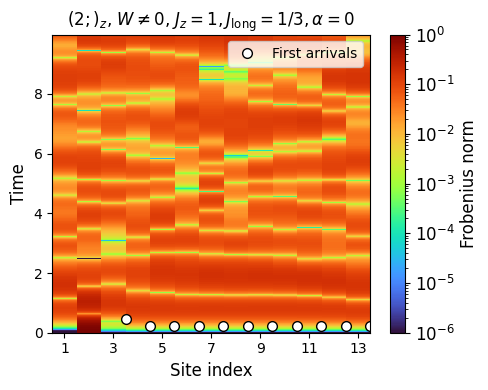

In [3]:

import numpy as np
import re
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def load_mathematica_data(filename):
    """
    Load data from a Mathematica-style text file:
    {0.001707401450201651 + 0.*I, 5.646194622954682*^-9 + 0.*I, ...}
    Returns: 2D numpy array (rows = lines, cols = entries per line)
    """
    data = []
    with open(filename, "r") as f:
        for line in f:
            # Normalize Mathematica scientific notation: *^ -> e
            line = line.replace("*^", "e")

            # Remove curly braces
            line = line.strip().lstrip("{").rstrip("}")
            
            # Split by comma
            entries = line.split(",")
            
            # Extract real part (ignore imaginary part)
            row = []
            for e in entries:
                e = e.strip()
                # Remove the "+ 0.*I" if present
                e = e.split("+")[0].strip()
                try:
                    row.append(float(e))
                except ValueError:
                    pass
            if row:
                data.append(row)
    return np.array(data)


# -----------------------------
# Example usage
# -----------------------------

# Define path to the data file
data_path = os.path.join("src", "zInitN13b6Wneq0a0.txt")

# Load data from file; first column = time, rest = spatial density over time
raw_data = load_mathematica_data(data_path)


print("Shape:", raw_data.shape)
print(raw_data[-3])  # print first two rows


# Example: dummy first arrival points
# === First arrival points (site, time) ===
arrivals = [
    (3, 0.45),
    (4, 0.23),
    (5, 0.23),
    (6, 0.23),
    (7, 0.23),
    (8, 0.23),
    (9, 0.23),
    (10, 0.23),
    (11, 0.23),
    (12, 0.23),
    (13, 0.22)
]


x_points = np.array([a[0] for a in arrivals])   # site indices
y_points = np.array([a[1] for a in arrivals])   # times

# === Linear fit ===
fit_params = np.polyfit(x_points, y_points, 1)
fit_fn = np.poly1d(fit_params)
x_fit = np.linspace(x_points.min(), x_points.max(), 200)
y_fit = fit_fn(x_fit)

slope, intercept = fit_params

# === Simulation step size ===
step_size = 0.01   # <-- input your step size here
steps_per_unit = 1 / step_size
n_steps = raw_data.shape[0]

# Time array (row index → physical time)
time_axis = np.arange(n_steps) / steps_per_unit
t_min, t_max = time_axis.min(), time_axis.max()

# === Heatmap ===
plt.figure(figsize=(5, 4))

im = plt.imshow(
    raw_data,
    aspect="auto",
    origin="lower",
    cmap="turbo",
    interpolation="none",
    norm=mcolors.LogNorm(vmin=1e-6, vmax=raw_data.max()),
    extent=[0, raw_data.shape[1], t_min, t_max + 0.001]  # <-- keep full extent
)


# Overlay first arrival points
plt.plot(x_points, y_points, 'wo', markersize=7,
         markeredgecolor="k", label="First arrivals")

# Overlay best-fit line
# plt.plot(x_fit, y_fit, 'w--', linewidth=2, label="Linear fit")

# Labels
cbar = plt.colorbar(im, label="Frobenius norm")
cbar.ax.tick_params(labelsize=12)   # set tick font size
cbar.set_label("Frobenius norm", fontsize=12)  # set label font size

plt.xlabel("Site index", fontsize=12)
plt.ylabel("Time", fontsize=12)
plt.title(r"$(2;)_z$, $W\neq0$, $J_z=1, J_{\mathrm{long}}=1/3, \alpha=0$", fontsize=12)

# Fix site index ticks at centers
n_sites = raw_data.shape[1]
step = 2  # show every 2nd site index
positions = np.arange(0.5, n_sites, step)
labels = np.arange(1, n_sites+1, step)

plt.xticks(positions, labels)


plt.legend(loc="upper right", fontsize=10)
plt.tight_layout()
plt.savefig("plt/zInitN13b6Wneq0a0.svg", bbox_inches="tight") 
plt.show()


Shape: (1000, 13)
[2.40264451e-05 4.00623345e-03 4.21360166e-03 5.35271671e-03
 4.87066983e-02 1.89686542e-02 4.63811387e-02 7.91429195e-02
 1.05868971e-01 6.89461957e-02 1.05151100e-01 1.72477368e-02
 7.27668548e-02]


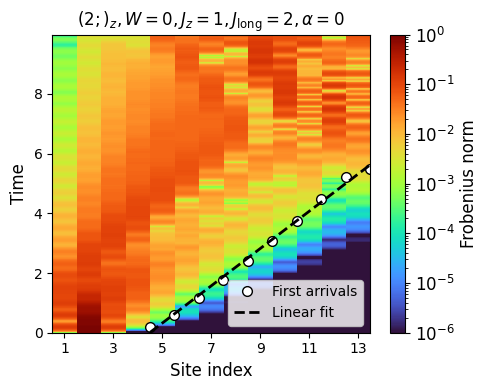

velocity: 1.602719766877124


In [6]:
import numpy as np
import re
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def load_mathematica_data(filename):
    """
    Load data from a Mathematica-style text file:
    {0.001707401450201651 + 0.*I, 5.646194622954682*^-9 + 0.*I, ...}
    Returns: 2D numpy array (rows = lines, cols = entries per line)
    """
    data = []
    with open(filename, "r") as f:
        for line in f:
            # Normalize Mathematica scientific notation: *^ -> e
            line = line.replace("*^", "e")

            # Remove curly braces
            line = line.strip().lstrip("{").rstrip("}")
            
            # Split by comma
            entries = line.split(",")
            
            # Extract real part (ignore imaginary part)
            row = []
            for e in entries:
                e = e.strip()
                # Remove the "+ 0.*I" if present
                e = e.split("+")[0].strip()
                try:
                    row.append(float(e))
                except ValueError:
                    pass
            if row:
                data.append(row)
    return np.array(data)


# -----------------------------
# Example usage
# -----------------------------

# Define path to the data file
data_path = os.path.join("src", "zInitN13b6W0a0.txt")

# Load data from file; first column = time, rest = spatial density over time
raw_data = load_mathematica_data(data_path)


print("Shape:", raw_data.shape)
print(raw_data[-3])  # print first two rows


# Example: dummy first arrival points
# === First arrival points (site, time) ===
arrivals = [
    (4, 0.2),
    (5, 0.61),
    (6, 1.17),
    (7, 1.77),
    (8, 2.41),
    (9, 3.07),
    (10, 3.76),
    (11, 4.49),
    (12, 5.21),
    (13, 5.48)
]


x_points = np.array([a[0] for a in arrivals])   # site indices
y_points = np.array([a[1] for a in arrivals])   # times

# === Linear fit ===
fit_params = np.polyfit(x_points, y_points, 1)
fit_fn = np.poly1d(fit_params)
x_fit = np.linspace(x_points.min(), x_points.max(), 200)
y_fit = fit_fn(x_fit)

slope, intercept = fit_params

# === Simulation step size ===
step_size = 0.01   # <-- input your step size here
steps_per_unit = 1 / step_size
n_steps = raw_data.shape[0]

# Time array (row index → physical time)
time_axis = np.arange(n_steps) / steps_per_unit
t_min, t_max = time_axis.min(), time_axis.max()

# === Heatmap ===
plt.figure(figsize=(5, 4))

im = plt.imshow(
    raw_data,
    aspect="auto",
    origin="lower",
    cmap="turbo",
    interpolation="none",
    norm=mcolors.LogNorm(vmin=1e-6, vmax=raw_data.max()),
    extent=[0, raw_data.shape[1], t_min, t_max + 0.001]  # <-- keep full extent
)


# Overlay first arrival points
plt.plot(x_points, y_points, 'wo', markersize=7,
         markeredgecolor="k", label="First arrivals")

# Overlay best-fit line
plt.plot(x_fit, y_fit, 'k--', linewidth=2, label="Linear fit")

# Labels
cbar = plt.colorbar(im, label="Frobenius norm")
cbar.ax.tick_params(labelsize=12)   # set tick font size
cbar.set_label("Frobenius norm", fontsize=12)  # set label font size

plt.xlabel("Site index", fontsize=12)
plt.ylabel("Time", fontsize=12)
plt.title(r"$(2;)_z, W=0, J_z=1, J_{\mathrm{long}}=2, \alpha=0$", fontsize=12)

# Fix site index ticks at centers
n_sites = raw_data.shape[1]
step = 2  # show every 2nd site index
positions = np.arange(0.5, n_sites, step)
labels = np.arange(1, n_sites + 1, step)

plt.xticks(positions, labels)


plt.legend(loc="lower right", fontsize=10)
plt.tight_layout()
plt.savefig("plt/zInitN13b6W0a0.svg", bbox_inches="tight") 
plt.show()
print("velocity:", 1/slope)



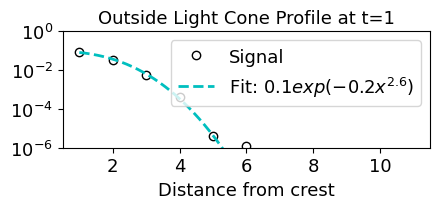

In [13]:


import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# === Pick time slice ===
time = 1  # physical time
t_index = int(time * steps_per_unit)
profile = raw_data[t_index, 2:]
sites = np.arange(1, profile.size+1)

# === Use first few points outside cone for fit ===
n_fit = 5   # number of points to use
x_fit_points = sites[:n_fit]
y_fit_points = profile[:n_fit]

# Avoid log of zero
mask = y_fit_points > 1e-14
x_fit_points = x_fit_points[mask]
y_fit_points = y_fit_points[mask]

# Model: log(y) = log(A) - a * x^p
def log_model(x, logA, a, p):
    return logA - a * (x**p)

# Fit in log space
logy = np.log(y_fit_points)
popt, _ = curve_fit(log_model, x_fit_points, logy,
                    p0=(np.log(y_fit_points.max()), 0.01, 2.0))
logA_fit, a_fit, p_fit = popt
A_fit = np.exp(logA_fit)

# Reconstruct fitted curve
x_dense = np.linspace(sites.min(), sites.max(), 300)
y_dense = A_fit * np.exp(-a_fit * x_dense**p_fit)

# === Plot semi-log (flattened aspect, bigger fonts) ===
plt.figure(figsize=(4.5, 2.2))  # flattened aspect
plt.semilogy(sites, profile, 'wo', markersize=6,
             markeredgecolor="k", label="Signal")
plt.semilogy(x_dense, y_dense, 'c--', linewidth=2,
             label=fr"Fit: ${A_fit:.1f}exp({{-{a_fit:.1f} x^{{{p_fit:.1f}}}}})$")

plt.xlabel("Distance from crest", fontsize=13)
# plt.ylabel("Frobenius Norm", fontsize=12)
plt.title(f"Outside Light Cone Profile at t={time}", fontsize=13)
plt.ylim(1e-6, 1)   # y-axis range
plt.legend(fontsize=13, loc="upper right")

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.tight_layout()
plt.savefig("plt/zInitN13b6W0a0OutLC.svg", bbox_inches="tight") 
plt.show()

# Jlong = 1/3, $\alpha=0$, band 1

Shape: (1000, 13)
[0.03393976 0.11166957 0.08974427 0.16079374 0.02013575 0.03285891
 0.00913878 0.04740299 0.02055571 0.0275254  0.02837271 0.00563192
 0.01173916]


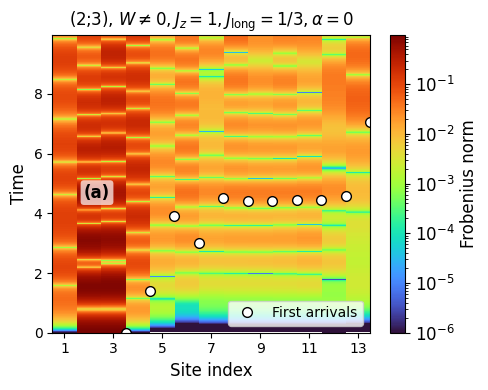

In [14]:
import numpy as np
import re
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def load_mathematica_data(filename):
    """
    Load data from a Mathematica-style text file:
    {0.001707401450201651 + 0.*I, 5.646194622954682*^-9 + 0.*I, ...}
    Returns: 2D numpy array (rows = lines, cols = entries per line)
    """
    data = []
    with open(filename, "r") as f:
        for line in f:
            # Normalize Mathematica scientific notation: *^ -> e
            line = line.replace("*^", "e")

            # Remove curly braces
            line = line.strip().lstrip("{").rstrip("}")
            
            # Split by comma
            entries = line.split(",")
            
            # Extract real part (ignore imaginary part)
            row = []
            for e in entries:
                e = e.strip()
                # Remove the "+ 0.*I" if present
                e = e.split("+")[0].strip()
                try:
                    row.append(float(e))
                except ValueError:
                    pass
            if row:
                data.append(row)
    return np.array(data)


# -----------------------------
# Example usage
# -----------------------------

# Define path to the data file
data_path = os.path.join("src", "N13b1Jlong03Jz1Wneq0a0.txt")

# Load data from file; first column = time, rest = spatial density over time
raw_data = load_mathematica_data(data_path)


print("Shape:", raw_data.shape)
print(raw_data[-3])  # print first two rows


# Example: dummy first arrival points
# === First arrival points (site, time) ===
arrivals = [
    (3, 0.0),
    (4, 1.4),
    (5, 3.91),
    (6, 3.01),
    (7, 4.51),
    (8, 4.42),
    (9, 4.41),
    (10, 4.43),
    (11, 4.45),
    (12, 4.58),
    (13, 7.06)
]


x_points = np.array([a[0] for a in arrivals])   # site indices
y_points = np.array([a[1] for a in arrivals])   # times

# === Linear fit ===
fit_params = np.polyfit(x_points, y_points, 1)
fit_fn = np.poly1d(fit_params)
x_fit = np.linspace(x_points.min(), x_points.max(), 200)
y_fit = fit_fn(x_fit)

slope, intercept = fit_params

# === Simulation step size ===
step_size = 0.01   # <-- input your step size here
steps_per_unit = 1 / step_size
n_steps = raw_data.shape[0]

# Time array (row index → physical time)
time_axis = np.arange(n_steps) / steps_per_unit
t_min, t_max = time_axis.min(), time_axis.max()

# === Heatmap ===
plt.figure(figsize=(5, 4))

im = plt.imshow(
    raw_data,
    aspect="auto",
    origin="lower",
    cmap="turbo",
    interpolation="none",
    norm=mcolors.LogNorm(vmin=1e-6, vmax=raw_data.max()),
    extent=[0, raw_data.shape[1], t_min, t_max]
)

# Overlay first arrival points
plt.plot(x_points, y_points, 'wo', markersize=7,
         markeredgecolor="k", label="First arrivals")

# Overlay best-fit line
# plt.plot(x_fit, y_fit, 'w--', linewidth=2, label="Linear fit")

# Labels
cbar = plt.colorbar(im, label="Frobenius norm")
cbar.ax.tick_params(labelsize=12)   # set tick font size
cbar.set_label("Frobenius norm", fontsize=12)  # set label font size

plt.xlabel("Site index", fontsize=12)
plt.ylabel("Time", fontsize=12)
plt.title(r"(2;3), $W\neq0, J_z=1, J_{\mathrm{long}}=1/3, \alpha=0$", fontsize=12)

# Fix site index ticks at centers
n_sites = raw_data.shape[1]
step = 2  # show every 2nd site index
positions = np.arange(0.5, n_sites, step)
labels = np.arange(1, n_sites + 1, step)

plt.xticks(positions, labels)
plt.text(
    0.1, 0.5, "(a)",
    transform=plt.gca().transAxes,
    fontsize=12, fontweight="bold", va="top",
    bbox=dict(facecolor="white", edgecolor="none", alpha=0.7, boxstyle="round,pad=0.2")
)

plt.legend(loc="lower right", fontsize=10)
plt.tight_layout()
plt.savefig("plt/N13b1Jlong03Jz1Wneq0a0.svg", bbox_inches="tight") 
plt.show()



Shape: (1000, 13)
[0.05257566 0.04880664 0.0744688  0.00910853 0.02515247 0.00159244
 0.04120899 0.0426951  0.08662732 0.00240389 0.19679134 0.04519144
 0.09988665]


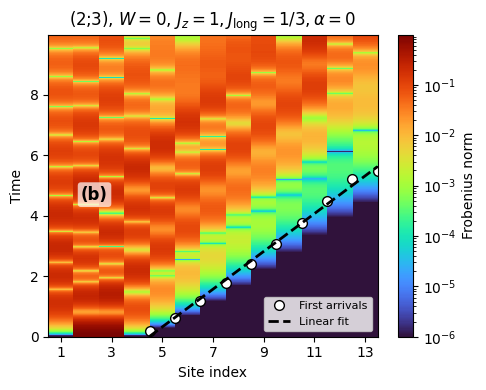

velocity: 1.602719766877124


In [16]:
import numpy as np
import re
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def load_mathematica_data(filename):
    """
    Load data from a Mathematica-style text file:
    {0.001707401450201651 + 0.*I, 5.646194622954682*^-9 + 0.*I, ...}
    Returns: 2D numpy array (rows = lines, cols = entries per line)
    """
    data = []
    with open(filename, "r") as f:
        for line in f:
            # Normalize Mathematica scientific notation: *^ -> e
            line = line.replace("*^", "e")

            # Remove curly braces
            line = line.strip().lstrip("{").rstrip("}")
            
            # Split by comma
            entries = line.split(",")
            
            # Extract real part (ignore imaginary part)
            row = []
            for e in entries:
                e = e.strip()
                # Remove the "+ 0.*I" if present
                e = e.split("+")[0].strip()
                try:
                    row.append(float(e))
                except ValueError:
                    pass
            if row:
                data.append(row)
    return np.array(data)


# -----------------------------
# Example usage
# -----------------------------

# Define path to the data file
data_path = os.path.join("src", "N13b1Jlong03Jz1W0a0.txt")

# Load data from file; first column = time, rest = spatial density over time
raw_data = load_mathematica_data(data_path)


print("Shape:", raw_data.shape)
print(raw_data[-3])  # print first two rows


# Example: dummy first arrival points
# === First arrival points (site, time) ===
arrivals = [
    (4, 0.2),
    (5, 0.61),
    (6, 1.17),
    (7, 1.77),
    (8, 2.41),
    (9, 3.07),
    (10, 3.76),
    (11, 4.49),
    (12, 5.21),
    (13, 5.48)
]


x_points = np.array([a[0] for a in arrivals])   # site indices
y_points = np.array([a[1] for a in arrivals])   # times

# === Linear fit ===
fit_params = np.polyfit(x_points, y_points, 1)
fit_fn = np.poly1d(fit_params)
x_fit = np.linspace(x_points.min(), x_points.max(), 200)
y_fit = fit_fn(x_fit)

slope, intercept = fit_params

# === Simulation step size ===
step_size = 0.01   # <-- input your step size here
steps_per_unit = 1 / step_size
n_steps = raw_data.shape[0]

# Time array (row index → physical time)
time_axis = np.arange(n_steps) / steps_per_unit
t_min, t_max = time_axis.min(), time_axis.max()

# === Heatmap ===
plt.figure(figsize=(5, 4))

# Apply floor to avoid log(0) or negatives
plot_data = raw_data.copy()
plot_data[plot_data <= 0] = 1e-12

im = plt.imshow(
    plot_data,
    aspect="auto",
    origin="lower",
    cmap="turbo",
    interpolation="none",
    norm=mcolors.LogNorm(vmin=1e-6, vmax=plot_data.max()),
    extent=[0, plot_data.shape[1], t_min, t_max]
)

# Overlay first arrival points
plt.plot(x_points, y_points, 'wo', markersize=7,
         markeredgecolor="k", label="First arrivals")

# Overlay best-fit line
plt.plot(x_fit, y_fit, 'k--', linewidth=2, label="Linear fit")

# Labels
plt.colorbar(im, label="Frobenius norm")
plt.xlabel("Site index")
plt.ylabel("Time")
plt.title(r"(2;3), $W=0$, $J_z=1, J_{\mathrm{long}}=1/3, \alpha=0$")

# Fix site index ticks at centers
n_sites = raw_data.shape[1]
step = 2  # show every 2nd site index
positions = np.arange(0.5, n_sites, step)
labels = np.arange(1, n_sites + 1, step)

plt.xticks(positions, labels)

plt.text(
    0.1, 0.5, "(b)",
    transform=plt.gca().transAxes,
    fontsize=12, fontweight="bold", va="top",
    bbox=dict(facecolor="white", edgecolor="none", alpha=0.7, boxstyle="round,pad=0.2")
)



plt.legend(loc="lower right", fontsize=8)
plt.tight_layout()
plt.savefig("plt/N13b1Jlong03Jz1W0a0.svg", bbox_inches="tight") 
plt.show()
print("velocity:", 1/slope)


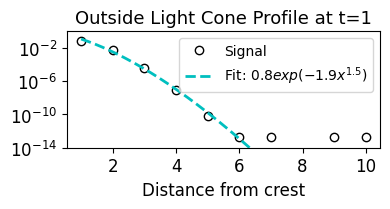

In [19]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# === Pick time slice ===
time = 1  # physical time
t_index = int(time * steps_per_unit)
profile = raw_data[t_index, 3:]
sites = np.arange(1, profile.size+1)

# === Use first few points outside cone for fit ===
n_fit = 6   # number of points to use
x_fit_points = sites[:n_fit]
y_fit_points = profile[:n_fit]

# Avoid log of zero
mask = y_fit_points > 1e-14
x_fit_points = x_fit_points[mask]
y_fit_points = y_fit_points[mask]

# Model: log(y) = log(A) - a * x^p
def log_model(x, logA, a, p):
    return logA - a * (x**p)

# Fit in log space
logy = np.log(y_fit_points)
popt, _ = curve_fit(log_model, x_fit_points, logy,
                    p0=(np.log(y_fit_points.max()), 0.01, 2.0))
logA_fit, a_fit, p_fit = popt
A_fit = np.exp(logA_fit)

# Reconstruct fitted curve
x_dense = np.linspace(sites.min(), sites.max(), 300)
y_dense = A_fit * np.exp(-a_fit * x_dense**p_fit)

# === Plot semi-log (flattened aspect, bigger fonts) ===
plt.figure(figsize=(4, 2.2))  # flattened aspect
plt.semilogy(sites, profile, 'wo', markersize=6,
             markeredgecolor="k", label="Signal")
plt.semilogy(x_dense, y_dense, 'c--', linewidth=2,
             label=fr"Fit: ${A_fit:.1f}exp({{-{a_fit:.1f} x^{{{p_fit:.1f}}}}})$")

plt.xlabel("Distance from crest", fontsize=12)
# plt.ylabel("Frobenius Norm", fontsize=12)
plt.title(f"Outside Light Cone Profile at t={time}", fontsize=13)
plt.ylim(1e-14, 1)   # y-axis range
plt.legend(fontsize=10, loc="upper right")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig("plt/N13b1Jlong03Jz1W0a0OutLC.svg", bbox_inches="tight") 
plt.show()


# Jlong =2, $\alpha=0$, band 1

Shape: (1000, 13)
[1.42417987e-04 1.07605287e-02 3.87784528e-03 7.22090764e-04
 1.33971088e-01 6.96350790e-02 5.95930365e-02 5.26041977e-02
 1.94403876e-02 7.19257577e-02 1.44701293e-02 2.46295831e-01
 1.55908074e-02]


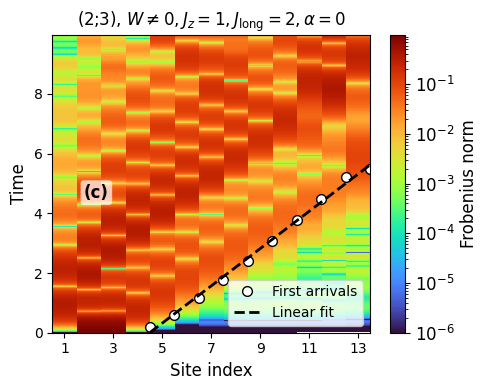

C:\Users\shrey\AppData\Local\Temp\ipykernel_29192\3080674188.py:165: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(log_model, x_fit_points, logy,


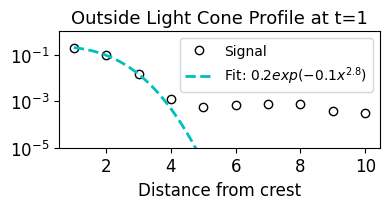

In [27]:
import numpy as np
import re
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def load_mathematica_data(filename):
    """
    Load data from a Mathematica-style text file:
    {0.001707401450201651 + 0.*I, 5.646194622954682*^-9 + 0.*I, ...}
    Returns: 2D numpy array (rows = lines, cols = entries per line)
    """
    data = []
    with open(filename, "r") as f:
        for line in f:
            # Normalize Mathematica scientific notation: *^ -> e
            line = line.replace("*^", "e")

            # Remove curly braces
            line = line.strip().lstrip("{").rstrip("}")
            
            # Split by comma
            entries = line.split(",")
            
            # Extract real part (ignore imaginary part)
            row = []
            for e in entries:
                e = e.strip()
                # Remove the "+ 0.*I" if present
                e = e.split("+")[0].strip()
                try:
                    row.append(float(e))
                except ValueError:
                    pass
            if row:
                data.append(row)
    return np.array(data)


# -----------------------------
# Example usage
# -----------------------------

# Define path to the data file
data_path = os.path.join("src", "N13b1Jlong2Jz1Wneq0a0.txt")

# Load data from file; first column = time, rest = spatial density over time
raw_data = load_mathematica_data(data_path)


print("Shape:", raw_data.shape)
print(raw_data[-3])  # print first two rows


# Example: dummy first arrival points
# === First arrival points (site, time) ===
arrivals = [
    (4, 0.2),
    (5, 0.61),
    (6, 1.17),
    (7, 1.77),
    (8, 2.41),
    (9, 3.07),
    (10, 3.76),
    (11, 4.49),
    (12, 5.21),
    (13, 5.48)
]


x_points = np.array([a[0] for a in arrivals])   # site indices
y_points = np.array([a[1] for a in arrivals])   # times

# === Linear fit ===
fit_params = np.polyfit(x_points, y_points, 1)
fit_fn = np.poly1d(fit_params)
x_fit = np.linspace(x_points.min(), x_points.max(), 200)
y_fit = fit_fn(x_fit)

slope, intercept = fit_params

# === Simulation step size ===
step_size = 0.01   # <-- input your step size here
steps_per_unit = 1 / step_size
n_steps = raw_data.shape[0]

# Time array (row index → physical time)
time_axis = np.arange(n_steps) / steps_per_unit
t_min, t_max = time_axis.min(), time_axis.max()

# === Heatmap ===
plt.figure(figsize=(5, 4))

im = plt.imshow(
    raw_data,
    aspect="auto",
    origin="lower",
    cmap="turbo",
    interpolation="none",
    norm=mcolors.LogNorm(vmin=1e-6, vmax=raw_data.max()),
    extent=[0, raw_data.shape[1], t_min, t_max]
)

# Overlay first arrival points
plt.plot(x_points, y_points, 'wo', markersize=7,
         markeredgecolor="k", label="First arrivals")

# Overlay best-fit line
plt.plot(x_fit, y_fit, 'k--', linewidth=2, label="Linear fit")

# Labels
cbar = plt.colorbar(im, label="Frobenius norm")
cbar.ax.tick_params(labelsize=12)   # set tick font size
cbar.set_label("Frobenius norm", fontsize=12)  # set label font size

plt.xlabel("Site index", fontsize=12)
plt.ylabel("Time", fontsize=12)
plt.title(r"(2;3), $W\neq0, J_z=1, J_{\mathrm{long}}=2, \alpha=0$", fontsize=12)

# Fix site index ticks at centers
n_sites = raw_data.shape[1]
step = 2  # show every 2nd site index
positions = np.arange(0.5, n_sites, step)
labels = np.arange(1, n_sites + 1, step)

plt.xticks(positions, labels)
plt.text(
    0.1, 0.5, "(c)",
    transform=plt.gca().transAxes,
    fontsize=12, fontweight="bold", va="top",
    bbox=dict(facecolor="white", edgecolor="none", alpha=0.7, boxstyle="round,pad=0.2")
)

plt.legend(loc="lower right", fontsize=10)
plt.tight_layout()
plt.savefig("plt/N13b1Jlong2Jz1Wneq0a0.svg", bbox_inches="tight") 
plt.show()

import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# === Pick time slice ===
time = 1  # physical time
t_index = int(time * steps_per_unit)
profile = raw_data[t_index, 3:]
sites = np.arange(1, profile.size+1)

# === Use first few points outside cone for fit ===
n_fit = 3   # number of points to use
x_fit_points = sites[:n_fit]
y_fit_points = profile[:n_fit]

# Avoid log of zero
mask = y_fit_points > 1e-14
x_fit_points = x_fit_points[mask]
y_fit_points = y_fit_points[mask]

# Model: log(y) = log(A) - a * x^p
def log_model(x, logA, a, p):
    return logA - a * (x**p)

# Fit in log space
logy = np.log(y_fit_points)
popt, _ = curve_fit(log_model, x_fit_points, logy,
                    p0=(np.log(y_fit_points.max()), 0.01, 2.0))
logA_fit, a_fit, p_fit = popt
A_fit = np.exp(logA_fit)

# Reconstruct fitted curve
x_dense = np.linspace(sites.min(), sites.max(), 300)
y_dense = A_fit * np.exp(-a_fit * x_dense**p_fit)

# === Plot semi-log (flattened aspect, bigger fonts) ===
plt.figure(figsize=(4, 2.2))  # flattened aspect
plt.semilogy(sites, profile, 'wo', markersize=6,
             markeredgecolor="k", label="Signal")
plt.semilogy(x_dense, y_dense, 'c--', linewidth=2,
             label=fr"Fit: ${A_fit:.1f}exp({{-{a_fit:.1f} x^{{{p_fit:.1f}}}}})$")

plt.xlabel("Distance from crest", fontsize=12)
# plt.ylabel("Frobenius Norm", fontsize=12)
plt.title(f"Outside Light Cone Profile at t={time}", fontsize=13)
plt.ylim(1e-5, 1)   # y-axis range
plt.legend(fontsize=10, loc="upper right")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig("plt/N13b1Jlong2Jz1Wneq0a0OutLC.svg", bbox_inches="tight") 
plt.show()



Shape: (1000, 13)
[0.0018521  0.01236828 0.01271562 0.01504449 0.10714108 0.06074562
 0.16018654 0.03134035 0.00297795 0.13740487 0.02325757 0.36296166
 0.01392364]


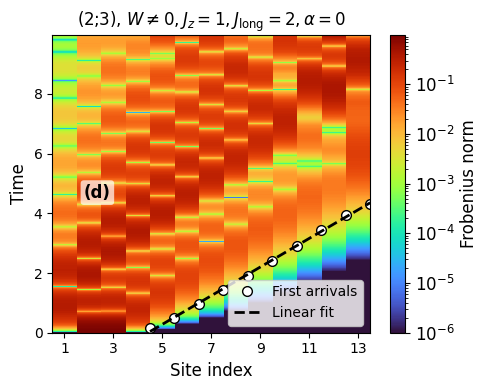

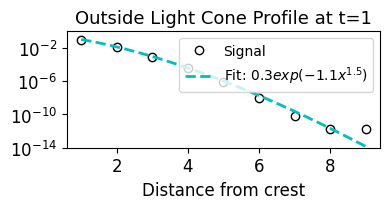

In [47]:
import numpy as np
import re
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def load_mathematica_data(filename):
    """
    Load data from a Mathematica-style text file:
    {0.001707401450201651 + 0.*I, 5.646194622954682*^-9 + 0.*I, ...}
    Returns: 2D numpy array (rows = lines, cols = entries per line)
    """
    data = []
    with open(filename, "r") as f:
        for line in f:
            # Normalize Mathematica scientific notation: *^ -> e
            line = line.replace("*^", "e")

            # Remove curly braces
            line = line.strip().lstrip("{").rstrip("}")
            
            # Split by comma
            entries = line.split(",")
            
            # Extract real part (ignore imaginary part)
            row = []
            for e in entries:
                e = e.strip()
                # Remove the "+ 0.*I" if present
                e = e.split("+")[0].strip()
                try:
                    row.append(float(e))
                except ValueError:
                    pass
            if row:
                data.append(row)
    return np.array(data)


# -----------------------------
# Example usage
# -----------------------------

# Define path to the data file
data_path = os.path.join("src", "N13b1Jlong2Jz1W0a0.txt")

# Load data from file; first column = time, rest = spatial density over time
raw_data = load_mathematica_data(data_path)


print("Shape:", raw_data.shape)
print(raw_data[-3])  # print first two rows


# Example: dummy first arrival points
# === First arrival points (site, time) ===
arrivals = [ (4, 0.16), (5, 0.49), (6, 0.95), (7, 1.42),
    (8, 1.91), (9, 2.41), (10, 2.92), (11, 3.44),
    (12, 3.96), (13, 4.31)
]


x_points = np.array([a[0] for a in arrivals])   # site indices
y_points = np.array([a[1] for a in arrivals])   # times

# === Linear fit ===
fit_params = np.polyfit(x_points, y_points, 1)
fit_fn = np.poly1d(fit_params)
x_fit = np.linspace(x_points.min(), x_points.max(), 200)
y_fit = fit_fn(x_fit)

slope, intercept = fit_params

# === Simulation step size ===
step_size = 0.01   # <-- input your step size here
steps_per_unit = 1 / step_size
n_steps = raw_data.shape[0]

# Time array (row index → physical time)
time_axis = np.arange(n_steps) / steps_per_unit
t_min, t_max = time_axis.min(), time_axis.max()

# === Heatmap ===
plt.figure(figsize=(5, 4))

# Apply floor to avoid log(0) or negatives
plot_data = raw_data.copy()
plot_data[plot_data <= 0] = 1e-12

im = plt.imshow(
    plot_data,
    aspect="auto",
    origin="lower",
    cmap="turbo",
    interpolation="none",
    norm=mcolors.LogNorm(vmin=1e-6, vmax=plot_data.max()),
    extent=[0, plot_data.shape[1], t_min, t_max]
)

# Overlay first arrival points
plt.plot(x_points, y_points, 'wo', markersize=7,
         markeredgecolor="k", label="First arrivals")

# Overlay best-fit line
plt.plot(x_fit, y_fit, 'k--', linewidth=2, label="Linear fit")

# Labels
cbar = plt.colorbar(im, label="Frobenius norm")
cbar.ax.tick_params(labelsize=12)   # set tick font size
cbar.set_label("Frobenius norm", fontsize=12)  # set label font size

plt.xlabel("Site index", fontsize=12)
plt.ylabel("Time", fontsize=12)
plt.title(r"(2;3), $W\neq0, J_z=1, J_{\mathrm{long}}=2, \alpha=0$", fontsize=12)

# Fix site index ticks at centers
n_sites = raw_data.shape[1]
step = 2  # show every 2nd site index
positions = np.arange(0.5, n_sites, step)
labels = np.arange(1, n_sites + 1, step)

plt.xticks(positions, labels)
plt.text(
    0.1, 0.5, "(d)",
    transform=plt.gca().transAxes,
    fontsize=12, fontweight="bold", va="top",
    bbox=dict(facecolor="white", edgecolor="none", alpha=0.7, boxstyle="round,pad=0.2")
)

plt.legend(loc="lower right", fontsize=10)
plt.tight_layout()
plt.savefig("plt/N13b1Jlong2Jz1W0a0.svg", bbox_inches="tight") 
plt.show()

import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# === Pick time slice ===
time = 1  # physical time
t_index = int(time * steps_per_unit)
profile = raw_data[t_index, 4:]
sites = np.arange(1, profile.size+1)

# === Use first few points outside cone for fit ===
n_fit = 8   # number of points to use
x_fit_points = sites[:n_fit]
y_fit_points = profile[:n_fit]

# Avoid log of zero
mask = y_fit_points > 1e-6
x_fit_points = x_fit_points[mask]
y_fit_points = y_fit_points[mask]

# Model: log(y) = log(A) - a * x^p
def log_model(x, logA, a, p):
    return logA - a * (x**p)

# Fit in log space
logy = np.log(y_fit_points)
popt, _ = curve_fit(log_model, x_fit_points, logy,
                    p0=(np.log(y_fit_points.max()), 0.01, 2.0))
logA_fit, a_fit, p_fit = popt
A_fit = np.exp(logA_fit)

# Reconstruct fitted curve
x_dense = np.linspace(sites.min(), sites.max(), 300)
y_dense = A_fit * np.exp(-a_fit * x_dense**p_fit)

# === Plot semi-log (flattened aspect, bigger fonts) ===
plt.figure(figsize=(4, 2.2))  # flattened aspect
plt.semilogy(sites, profile, 'wo', markersize=6,
             markeredgecolor="k", label="Signal")
plt.semilogy(x_dense, y_dense, 'c--', linewidth=2,
             label=fr"Fit: ${A_fit:.1f}exp({{-{a_fit:.1f} x^{{{p_fit:.1f}}}}})$")

plt.xlabel("Distance from crest", fontsize=12)
# plt.ylabel("Frobenius Norm", fontsize=12)
plt.title(f"Outside Light Cone Profile at t={time}", fontsize=13)
plt.ylim(1e-14, 1)   # y-axis range
plt.legend(fontsize=10, loc="upper right")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig("plt/N13b1Jlong2Jz1W0a0OutLC.svg", bbox_inches="tight") 
plt.show()



# MidBandInitN15b7W0

Shape: (10000, 13)
[0.00529735 0.00245306 0.00590646 0.00760989 0.00343009 0.00425856
 0.00274302 0.00898235 0.00211119 0.00501964 0.00073178 0.00799714
 0.00508696]


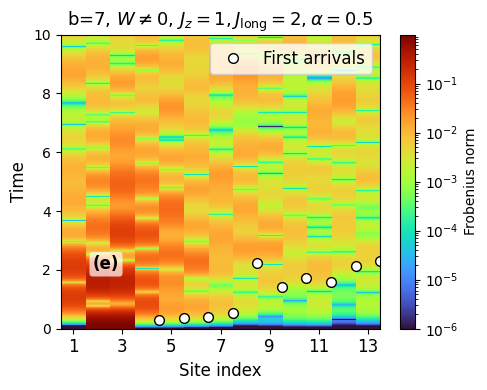

In [87]:
import numpy as np
import re
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def load_mathematica_data(filename):
    """
    Load data from a Mathematica-style text file:
    {0.001707401450201651 + 0.*I, 5.646194622954682*^-9 + 0.*I, ...}
    Returns: 2D numpy array (rows = lines, cols = entries per line)
    """
    data = []
    with open(filename, "r") as f:
        for line in f:
            # Normalize Mathematica scientific notation: *^ -> e
            line = line.replace("*^", "e")

            # Remove curly braces
            line = line.strip().lstrip("{").rstrip("}")
            
            # Split by comma
            entries = line.split(",")
            
            # Extract real part (ignore imaginary part)
            row = []
            for e in entries:
                e = e.strip()
                # Remove the "+ 0.*I" if present
                e = e.split("+")[0].strip()
                try:
                    row.append(float(e))
                except ValueError:
                    pass
            if row:
                data.append(row)
    return np.array(data)


# -----------------------------
# Example usage
# -----------------------------

# Define path to the data file
data_path = os.path.join("src", "N15b7Jlong2Jz1Wneq0a05.txt")

# Load data from file; first column = time, rest = spatial density over time
raw_data = load_mathematica_data(data_path)


print("Shape:", raw_data.shape)
print(raw_data[-3])  # print first two rows


# Example: dummy first arrival points
# === First arrival points (site, time) ===
arrivals = [
    (4, 0.31),
    (5, 0.36),
    (6, 0.41),
    (7, 0.54),
    (8, 2.25),
    (9, 1.41),
    (10, 1.72),
    (11, 1.58),
    (12, 2.12),
    (13, 2.30)
]


x_points = np.array([a[0] for a in arrivals])   # site indices
y_points = np.array([a[1] for a in arrivals])   # times

# === Linear fit ===
fit_params = np.polyfit(x_points, y_points, 1)
fit_fn = np.poly1d(fit_params)
x_fit = np.linspace(x_points.min(), x_points.max(), 200)
y_fit = fit_fn(x_fit)

slope, intercept = fit_params

# === Simulation step size ===
step_size = 0.001   # <-- input your step size here
steps_per_unit = 1 / step_size
n_steps = raw_data.shape[0]

# Time array (row index → physical time)
time_axis = np.arange(n_steps) / steps_per_unit
t_min, t_max = time_axis.min(), time_axis.max()

# === Heatmap ===
plt.figure(figsize=(5, 4))

im = plt.imshow(
    raw_data,
    aspect="auto",
    origin="lower",
    cmap="turbo",
    interpolation="none",
    norm=mcolors.LogNorm(vmin=1e-6, vmax=raw_data.max()),
    extent=[0, raw_data.shape[1], t_min, t_max + 0.001]  # <-- keep full extent
)

# Overlay first arrival points
plt.plot(x_points, y_points, 'wo', markersize=7,
         markeredgecolor="k", label="First arrivals")

# Overlay best-fit line
# plt.plot(x_fit, y_fit, 'w--', linewidth=2, label="Linear fit")

# Labels
plt.colorbar(im, label="Frobenius norm")
plt.xlabel("Site index", fontsize=12)
plt.ylabel("Time", fontsize=12)
plt.title(r"b=7, $W\neq0$, $J_z=1, J_{\mathrm{long}}=2, \alpha=0.5$", fontsize=13)

# Fix site index ticks at centers
n_sites = raw_data.shape[1]
step = 2  # show every 2nd site index
positions = np.arange(0.5, n_sites, step)
labels = np.arange(1, n_sites + 1, step)

plt.xticks(positions, labels, fontsize=12)

plt.text(
    0.1, 0.25, "(e)",
    transform=plt.gca().transAxes,
    fontsize=12, fontweight="bold", va="top",
    bbox=dict(facecolor="white", edgecolor="none", alpha=0.7, boxstyle="round,pad=0.2")
)

plt.legend(loc="upper right", fontsize=12)
plt.tight_layout()
plt.savefig("plt/N15b7Jlong2Jz1Wneq0a05.svg", bbox_inches="tight") 
plt.show()



Shape: (10000, 13)
[0.05525408 0.06688587 0.03952109 0.01196346 0.00109551 0.00159182
 0.0003435  0.01478636 0.05031809 0.03462589 0.02686338 0.09732936
 0.19215153]


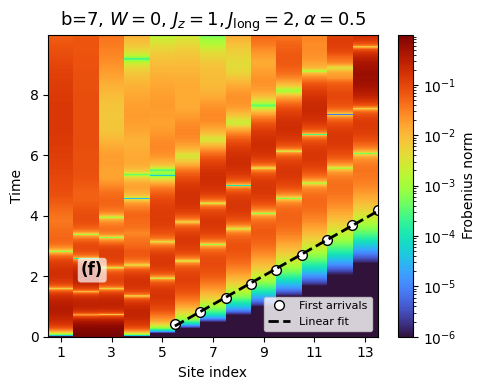

velocity: 2.106002106002106


In [88]:
import numpy as np
import re
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def load_mathematica_data(filename):
    """
    Load data from a Mathematica-style text file:
    {0.001707401450201651 + 0.*I, 5.646194622954682*^-9 + 0.*I, ...}
    Returns: 2D numpy array (rows = lines, cols = entries per line)
    """
    data = []
    with open(filename, "r") as f:
        for line in f:
            # Normalize Mathematica scientific notation: *^ -> e
            line = line.replace("*^", "e")

            # Remove curly braces
            line = line.strip().lstrip("{").rstrip("}")
            
            # Split by comma
            entries = line.split(",")
            
            # Extract real part (ignore imaginary part)
            row = []
            for e in entries:
                e = e.strip()
                # Remove the "+ 0.*I" if present
                e = e.split("+")[0].strip()
                try:
                    row.append(float(e))
                except ValueError:
                    pass
            if row:
                data.append(row)
    return np.array(data)


# -----------------------------
# Example usage
# -----------------------------

# Define path to the data file
data_path = os.path.join("src", "N15b7Jlong2Jz1W0a05.txt")

# Load data from file; first column = time, rest = spatial density over time
raw_data = load_mathematica_data(data_path)


print("Shape:", raw_data.shape)
print(raw_data[-3])  # print first two rows


# Example: dummy first arrival points
# === First arrival points (site, time) ===
arrivals = [
    (5, 0.42),
    (6, 0.83),
    (7, 1.27),
    (8, 1.74),
    (9, 2.22),
    (10, 2.71),
    (11, 3.20),
    (12, 3.69),
    (13, 4.19)
]



x_points = np.array([a[0] for a in arrivals])   # site indices
y_points = np.array([a[1] for a in arrivals])   # times

# === Linear fit ===
fit_params = np.polyfit(x_points, y_points, 1)
fit_fn = np.poly1d(fit_params)
x_fit = np.linspace(x_points.min(), x_points.max(), 200)
y_fit = fit_fn(x_fit)

slope, intercept = fit_params

# === Simulation step size ===
step_size = 0.001   # <-- input your step size here
steps_per_unit = 1 / step_size
n_steps = raw_data.shape[0]

# Time array (row index → physical time)
time_axis = np.arange(n_steps) / steps_per_unit
t_min, t_max = time_axis.min(), time_axis.max()

# === Heatmap ===
plt.figure(figsize=(5, 4))

im = plt.imshow(
    raw_data,
    aspect="auto",
    origin="lower",
    cmap="turbo",
    interpolation="none",
    norm=mcolors.LogNorm(vmin=1e-6, vmax=raw_data.max()),
    extent=[0, raw_data.shape[1], t_min, t_max]
)

# Overlay first arrival points
plt.plot(x_points, y_points, 'wo', markersize=7,
         markeredgecolor="k", label="First arrivals")

# Overlay best-fit line
plt.plot(x_fit, y_fit, 'k--', linewidth=2, label="Linear fit")

# Labels
plt.colorbar(im, label="Frobenius norm")
plt.xlabel("Site index")
plt.ylabel("Time")
plt.title(r"b=7, $W=0$, $J_z=1, J_{\mathrm{long}}=2, \alpha=0.5$", fontsize=13)

# Fix site index ticks at centers
n_sites = raw_data.shape[1]
step = 2  # show every 2nd site index
positions = np.arange(0.5, n_sites, step)
labels = np.arange(1, n_sites + 1, step)

plt.xticks(positions, labels)

plt.text(
    0.1, 0.25, "(f)",
    transform=plt.gca().transAxes,
    fontsize=12, fontweight="bold", va="top",
    bbox=dict(facecolor="white", edgecolor="none", alpha=0.7, boxstyle="round,pad=0.2")
)

plt.legend(loc="lower right", fontsize=8)
plt.tight_layout()
plt.savefig("plt/N15b7Jlong2Jz1W0a05.svg", bbox_inches="tight") 
plt.show()
print("velocity:", 1/slope)


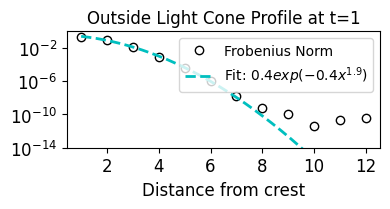

In [65]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# === Pick time slice ===
time = 1  # physical time
t_index = int(time * steps_per_unit)
profile = raw_data[t_index, 3:]
sites = np.arange(1, profile.size+1)

# === Use first few points outside cone for fit ===
n_fit = 6   # number of points to use
x_fit_points = sites[:n_fit]
y_fit_points = profile[:n_fit]

# Avoid log of zero
mask = y_fit_points > 1e-14
x_fit_points = x_fit_points[mask]
y_fit_points = y_fit_points[mask]

# Model: log(y) = log(A) - a * x^p
def log_model(x, logA, a, p):
    return logA - a * (x**p)

# Fit in log space
logy = np.log(y_fit_points)
popt, _ = curve_fit(log_model, x_fit_points, logy,
                    p0=(np.log(y_fit_points.max()), 0.01, 2.0))
logA_fit, a_fit, p_fit = popt
A_fit = np.exp(logA_fit)

# Reconstruct fitted curve
x_dense = np.linspace(sites.min(), sites.max(), 300)
y_dense = A_fit * np.exp(-a_fit * x_dense**p_fit)

# === Plot semi-log (flattened aspect, bigger fonts) ===
plt.figure(figsize=(4, 2.2))  # flattened aspect
plt.semilogy(sites, profile, 'wo', markersize=6,
             markeredgecolor="k", label="Frobenius Norm")
plt.semilogy(x_dense, y_dense, 'c--', linewidth=2,
             label=fr"Fit: ${A_fit:.1f}exp({{-{a_fit:.1f} x^{{{p_fit:.1f}}}}})$")

plt.xlabel("Distance from crest", fontsize=12)
# plt.ylabel("Frobenius Norm", fontsize=12)
plt.title(f"Outside Light Cone Profile at t={time}", fontsize=12)
plt.ylim(1e-14, 1)   # y-axis range
plt.legend(fontsize=10, loc="upper right")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig("plt/N15b7Jlong2Jz1W0a05OutLC.svg", bbox_inches="tight") 
plt.show()


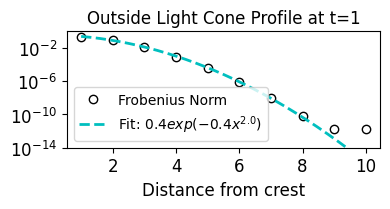

In [62]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# === Pick time slice ===
time = 1  # physical time
t_index = int(time * steps_per_unit)
profile = raw_data[t_index, 3:]
sites = np.arange(1, profile.size+1)

# === Use first few points outside cone for fit ===
n_fit = 6   # number of points to use
x_fit_points = sites[:n_fit]
y_fit_points = profile[:n_fit]

# Avoid log of zero
mask = y_fit_points > 1e-14
x_fit_points = x_fit_points[mask]
y_fit_points = y_fit_points[mask]

# Model: log(y) = log(A) - a * x^p
def log_model(x, logA, a, p):
    return logA - a * (x**p)

# Fit in log space
logy = np.log(y_fit_points)
popt, _ = curve_fit(log_model, x_fit_points, logy,
                    p0=(np.log(y_fit_points.max()), 0.01, 2.0))
logA_fit, a_fit, p_fit = popt
A_fit = np.exp(logA_fit)

# Reconstruct fitted curve
x_dense = np.linspace(sites.min(), sites.max(), 300)
y_dense = A_fit * np.exp(-a_fit * x_dense**p_fit)

# === Plot semi-log (flattened aspect, bigger fonts) ===
plt.figure(figsize=(4, 2.2))  # flattened aspect
plt.semilogy(sites, profile, 'wo', markersize=6,
             markeredgecolor="k", label="Frobenius Norm")
plt.semilogy(x_dense, y_dense, 'c--', linewidth=2,
             label=fr"Fit: ${A_fit:.1f}exp({{-{a_fit:.1f} x^{{{p_fit:.1f}}}}})$")

plt.xlabel("Distance from crest", fontsize=12)
# plt.ylabel("Frobenius Norm", fontsize=12)
plt.title(f"Outside Light Cone Profile at t={time}", fontsize=12)
plt.ylim(1e-14, 1)   # y-axis range
plt.legend(fontsize=10, loc="lower left")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig("plt/N13b1Jlong2Jz1W0a0OutLC.svg", bbox_inches="tight") 
plt.show()


## alpha=1.5

Shape: (1000, 13)
Last 3 rows sample:
 [[0.07256585 0.18354515 0.03403107 0.08102136 0.06533734 0.10927505
  0.03020951 0.19792586 0.02633133 0.02901012 0.00521798 0.17516083
  0.02101371]
 [0.07291858 0.18076318 0.0335287  0.08240116 0.06442519 0.10970556
  0.03007184 0.19904603 0.02545235 0.02879476 0.00416104 0.17523784
  0.02061866]
 [0.07320234 0.17785908 0.03285302 0.08376423 0.06356148 0.11012415
  0.02995438 0.20012741 0.02448259 0.02853728 0.00313439 0.17529493
  0.02024077]]
Fit slope = 0.327, intercept = -1.566


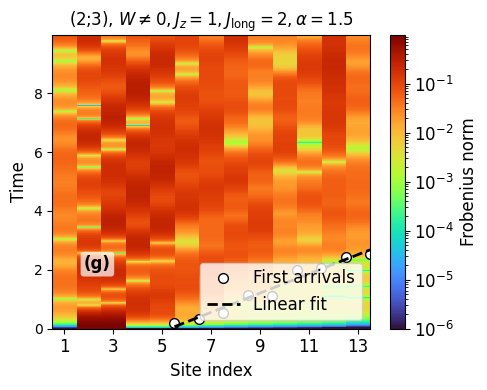

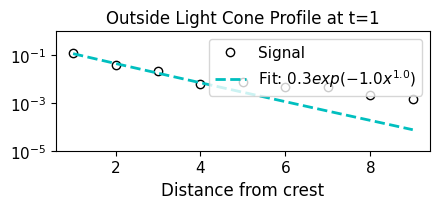

In [85]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def load_mathematica_data(filename):
    """
    Load data from a Mathematica-style text file:
    Example line: {0.001707401450201651 + 0.*I, 5.646194622954682*^-9 + 0.*I, ...}
    
    Returns:
        np.ndarray: 2D numpy array (rows = lines, cols = entries per line)
    """
    data = []
    with open(filename, "r") as f:
        for line in f:
            # Normalize Mathematica scientific notation: *^ -> e
            line = line.replace("*^", "e")

            # Remove curly braces and whitespace
            line = line.strip().lstrip("{").rstrip("}")

            if not line:
                continue  # skip empty lines

            # Split by commas
            entries = line.split(",")

            # Extract real part (ignore imaginary part)
            row = []
            for e in entries:
                e = e.strip()
                if "+ 0." in e:  # drop imaginary parts like "+ 0.*I"
                    e = e.split("+")[0].strip()
                if "*I" in e:  # just in case some entries are pure imaginary
                    continue
                try:
                    row.append(float(e))
                except ValueError:
                    pass
            if row:
                data.append(row)
    return np.array(data)


# -----------------------------
# Example usage
# -----------------------------

# Define path to the data file
data_path = os.path.join("src", "N13b1Jlong2Jz1Wneq0a15.txt")

# Load data from file
raw_data = load_mathematica_data(data_path)

print("Shape:", raw_data.shape)
print("Last 3 rows sample:\n", raw_data[-3:])  # safer than raw_data[-3]

# === First arrival points (site, time) ===
arrivals = [
    (5, 0.21), (6, 0.32), (7, 0.54), (8, 1.13),
    (9, 1.12), (10, 2.0), (11, 2.07), (12, 2.45), (13, 2.53)
]

x_points = np.array([a[0] for a in arrivals])   # site indices
y_points = np.array([a[1] for a in arrivals])   # times

# === Linear fit ===
fit_params = np.polyfit(x_points, y_points, 1)
fit_fn = np.poly1d(fit_params)
x_fit = np.linspace(x_points.min(), x_points.max(), 200)
y_fit = fit_fn(x_fit)

slope, intercept = fit_params
print(f"Fit slope = {slope:.3f}, intercept = {intercept:.3f}")

# === Simulation step size ===
step_size = 0.01   # <-- input your step size here
steps_per_unit = 1 / step_size
n_steps = raw_data.shape[0]

# Time array (row index → physical time)
time_axis = np.arange(n_steps) / steps_per_unit
t_min, t_max = time_axis.min(), time_axis.max()

# === Heatmap ===
plt.figure(figsize=(5, 4))

im = plt.imshow(
    raw_data,
    aspect="auto",
    origin="lower",
    cmap="turbo",
    interpolation="none",
    norm=mcolors.LogNorm(vmin=1e-6, vmax=raw_data.max()),
    extent=[0, raw_data.shape[1], t_min, t_max]
)

# Overlay first arrival points
plt.plot(x_points, y_points, 'wo', markersize=7,
         markeredgecolor="k", label="First arrivals")

# Overlay best-fit line
plt.plot(x_fit, y_fit, 'k--', linewidth=2, label="Linear fit")

# Labels
cbar = plt.colorbar(im, label="Frobenius norm")
cbar.ax.tick_params(labelsize=12)   # set tick font size
cbar.set_label("Frobenius norm", fontsize=12)  # set label font size

plt.text(
    0.1, 0.25, "(g)",
    transform=plt.gca().transAxes,
    fontsize=12, fontweight="bold", va="top",
    bbox=dict(facecolor="white", edgecolor="none", alpha=0.7, boxstyle="round,pad=0.2")
)

plt.xlabel("Site index", fontsize=12)
plt.ylabel("Time", fontsize=12)
plt.title(r"(2;3), $W\neq 0, J_z=1, J_{\mathrm{long}}=2, \alpha=1.5$", fontsize=12)

# Fix site index ticks at centers
n_sites = raw_data.shape[1]
step = 2  # show every 2nd site index
positions = np.arange(0.5, n_sites, step)
labels = np.arange(1, n_sites + 1, step)
plt.xticks(positions, labels, fontsize=12)

plt.legend(loc="lower right", fontsize=12)
plt.tight_layout()

os.makedirs("plt", exist_ok=True)  # ensure folder exists
plt.savefig("plt/N13b1Jlong2Jz1Wneq0a15.svg", bbox_inches="tight")
plt.show()
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# === Pick time slice ===
time = 1  # physical time
t_index = int(time * steps_per_unit)
profile = raw_data[t_index, 4:]
sites = np.arange(1, profile.size+1)

# === Use first few points outside cone for fit ===
n_fit = 4   # number of points to use
x_fit_points = sites[:n_fit]
y_fit_points = profile[:n_fit]

# Avoid log of zero
mask = y_fit_points > 1e-14
x_fit_points = x_fit_points[mask]
y_fit_points = y_fit_points[mask]

# Model: log(y) = log(A) - a * x^p
def log_model(x, logA, a, p):
    return logA - a * (x**p)

# Fit in log space
logy = np.log(y_fit_points)
popt, _ = curve_fit(log_model, x_fit_points, logy,
                    p0=(np.log(y_fit_points.max()), 0.01, 2.0))
logA_fit, a_fit, p_fit = popt
A_fit = np.exp(logA_fit)

# Reconstruct fitted curve
x_dense = np.linspace(sites.min(), sites.max(), 300)
y_dense = A_fit * np.exp(-a_fit * x_dense**p_fit)

# === Plot semi-log (flattened aspect, bigger fonts) ===
plt.figure(figsize=(4.5, 2.2))  # flattened aspect
plt.semilogy(sites, profile, 'wo', markersize=6,
             markeredgecolor="k", label="Signal")
plt.semilogy(x_dense, y_dense, 'c--', linewidth=2,
             label=fr"Fit: ${A_fit:.1f}exp({{-{a_fit:.1f} x^{{{p_fit:.1f}}}}})$")

plt.xlabel("Distance from crest", fontsize=12)
# plt.ylabel("Frobenius Norm", fontsize=12)
plt.title(f"Outside Light Cone Profile at t={time}", fontsize=12)
plt.ylim(1e-5, 1)   # y-axis range
plt.legend(fontsize=11, loc="upper right")

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)


plt.tight_layout()
plt.savefig("plt/Band1InitN13Wneq0a15OutLC.svg", bbox_inches="tight") 
plt.show()



Shape: (1000, 13)
Last 3 rows sample:
 [[0.11497022 0.0035146  0.04585385 0.16792889 0.07278079 0.10061763
  0.15063072 0.06935106 0.06183206 0.0817762  0.02734672 0.00596951
  0.00050074]
 [0.11597549 0.0028765  0.04757354 0.16938389 0.07024803 0.1031553
  0.1503577  0.06697444 0.06311025 0.08170144 0.02586551 0.0056934
  0.00052594]
 [0.11701175 0.00229908 0.04929128 0.17080895 0.06767405 0.10566497
  0.15004063 0.06457885 0.06438816 0.08156417 0.02439295 0.00540327
  0.00055196]]
Fit slope = 0.494, intercept = -2.022


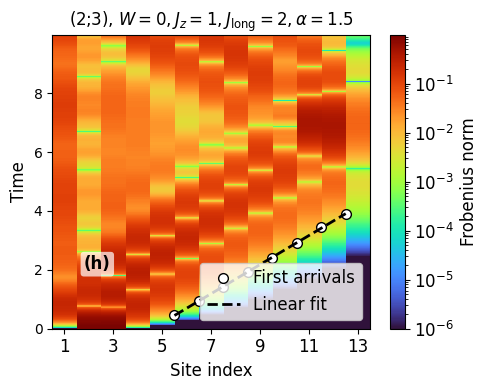

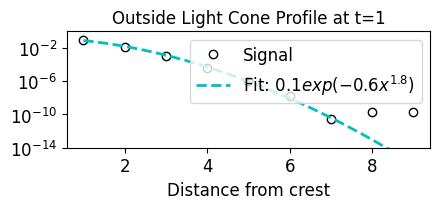

In [84]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def load_mathematica_data(filename):
    """
    Load data from a Mathematica-style text file:
    Example line: {0.001707401450201651 + 0.*I, 5.646194622954682*^-9 + 0.*I, ...}
    
    Returns:
        np.ndarray: 2D numpy array (rows = lines, cols = entries per line)
    """
    data = []
    with open(filename, "r") as f:
        for line in f:
            # Normalize Mathematica scientific notation: *^ -> e
            line = line.replace("*^", "e")

            # Remove curly braces and whitespace
            line = line.strip().lstrip("{").rstrip("}")

            if not line:
                continue  # skip empty lines

            # Split by commas
            entries = line.split(",")

            # Extract real part (ignore imaginary part)
            row = []
            for e in entries:
                e = e.strip()
                if "+ 0." in e:  # drop imaginary parts like "+ 0.*I"
                    e = e.split("+")[0].strip()
                if "*I" in e:  # just in case some entries are pure imaginary
                    continue
                try:
                    row.append(float(e))
                except ValueError:
                    pass
            if row:
                data.append(row)
    return np.array(data)


# -----------------------------
# Example usage
# -----------------------------

# Define path to the data file
data_path = os.path.join("src", "N13b1Jlong2Jz1W0a15.txt")

# Load data from file
raw_data = load_mathematica_data(data_path)

print("Shape:", raw_data.shape)
print("Last 3 rows sample:\n", raw_data[-3:])  # safer than raw_data[-3]

# === First arrival points (site, time) ===
arrivals = [
 (5, 0.48), (6, 0.94), (7, 1.42), (8, 1.91),
    (9, 2.41), (10, 2.92), (11, 3.44), (12, 3.91)
]

x_points = np.array([a[0] for a in arrivals])   # site indices
y_points = np.array([a[1] for a in arrivals])   # times

# === Linear fit ===
fit_params = np.polyfit(x_points, y_points, 1)
fit_fn = np.poly1d(fit_params)
x_fit = np.linspace(x_points.min(), x_points.max(), 200)
y_fit = fit_fn(x_fit)

slope, intercept = fit_params
print(f"Fit slope = {slope:.3f}, intercept = {intercept:.3f}")

# === Simulation step size ===
step_size = 0.01   # <-- input your step size here
steps_per_unit = 1 / step_size
n_steps = raw_data.shape[0]

# Time array (row index → physical time)
time_axis = np.arange(n_steps) / steps_per_unit
t_min, t_max = time_axis.min(), time_axis.max()

# === Heatmap ===
plt.figure(figsize=(5, 4))

im = plt.imshow(
    raw_data,
    aspect="auto",
    origin="lower",
    cmap="turbo",
    interpolation="none",
    norm=mcolors.LogNorm(vmin=1e-6, vmax=raw_data.max()),
    extent=[0, raw_data.shape[1], t_min, t_max]
)

# Overlay first arrival points
plt.plot(x_points, y_points, 'wo', markersize=7,
         markeredgecolor="k", label="First arrivals")

# Overlay best-fit line
plt.plot(x_fit, y_fit, 'k--', linewidth=2, label="Linear fit")

# Labels
cbar = plt.colorbar(im, label="Frobenius norm")
cbar.ax.tick_params(labelsize=12)   # set tick font size
cbar.set_label("Frobenius norm", fontsize=12)  # set label font size

plt.text(
    0.1, 0.25, "(h)",
    transform=plt.gca().transAxes,
    fontsize=12, fontweight="bold", va="top",
    bbox=dict(facecolor="white", edgecolor="none", alpha=0.7, boxstyle="round,pad=0.2")
)
plt.xlabel("Site index", fontsize=12)
plt.ylabel("Time", fontsize=12)
plt.title(r"(2;3), $W=0, J_z=1, J_{\mathrm{long}}=2, \alpha=1.5$", fontsize=12)

# Fix site index ticks at centers
n_sites = raw_data.shape[1]
step = 2  # show every 2nd site index
positions = np.arange(0.5, n_sites, step)
labels = np.arange(1, n_sites + 1, step)
plt.xticks(positions, labels, fontsize=12)

plt.legend(loc="lower right", fontsize=12)
plt.tight_layout()

os.makedirs("plt", exist_ok=True)  # ensure folder exists
plt.savefig("plt/N13b1Jlong2Jz1W0a15.svg", bbox_inches="tight")
plt.show()
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# === Pick time slice ===
time = 1  # physical time
t_index = int(time * steps_per_unit)
profile = raw_data[t_index, 4:]
sites = np.arange(1, profile.size+1)

# === Use first few points outside cone for fit ===
n_fit = 7   # number of points to use
x_fit_points = sites[:n_fit]
y_fit_points = profile[:n_fit]

# Avoid log of zero
mask = y_fit_points > 1e-14
x_fit_points = x_fit_points[mask]
y_fit_points = y_fit_points[mask]

# Model: log(y) = log(A) - a * x^p
def log_model(x, logA, a, p):
    return logA - a * (x**p)

# Fit in log space
logy = np.log(y_fit_points)
popt, _ = curve_fit(log_model, x_fit_points, logy,
                    p0=(np.log(y_fit_points.max()), 0.01, 2.0))
logA_fit, a_fit, p_fit = popt
A_fit = np.exp(logA_fit)

# Reconstruct fitted curve
x_dense = np.linspace(sites.min(), sites.max(), 300)
y_dense = A_fit * np.exp(-a_fit * x_dense**p_fit)

# === Plot semi-log (flattened aspect, bigger fonts) ===
plt.figure(figsize=(4.5, 2.2))  # flattened aspect
plt.semilogy(sites, profile, 'wo', markersize=6,
             markeredgecolor="k", label="Signal")
plt.semilogy(x_dense, y_dense, 'c--', linewidth=2,
             label=fr"Fit: ${A_fit:.1f}exp({{-{a_fit:.1f} x^{{{p_fit:.1f}}}}})$")

plt.xlabel("Distance from crest", fontsize=12)
# plt.ylabel("Frobenius Norm", fontsize=12)
plt.title(f"Outside Light Cone Profile at t={time}", fontsize=12)
plt.ylim(1e-14, 1)   # y-axis range
plt.legend(fontsize=12, loc="upper right")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig("plt/Band1InitN13W0a15OutLC.svg", bbox_inches="tight") 
plt.show()

